# 05 Scipy

**For a better understanding of this notebook, the 03 Scipy and 04 Scipy notebook should be known.**   
As a last topic from the Scipy stack, computational geometry well be put to focus. This is the link form a maths-related scientific toolbox to the more applied and GIS related packages like GDAL, shapely or fiona. Similar to integration or differentiation problems covered in the **04 Scipy** notebook, geometric tasks can be solved on a symbolic or numerical basis using the scipy stack.

In [1]:
%matplotlib inline
import numpy as np
import sympy
import matplotlib.pyplot as plt
from matplotlib import patches

### symbolic geometry

The term *symbolic geometry* is not mathematically correct but based on the similarity to other scipy modules. Using the sympy package, geometric problems can be solved analytically by solving geometric equations, which even allows another equation as a solution. Similar to the integration solver introduced in **04 Scipy** these solutions might be very resource consumptive and awkward. Nevertheless, sympy is really helpful for developing an in-depth understanding of geometric equations or models

In [2]:
from sympy.geometry import *

Let's create and plot some basic geometries before heading to calculations.

In [3]:
# points
p1 = Point(0,0)
p2 = Point(1,1)
p3 = Point(2,2)
p4 = Point(1,0)

# line 
l = Line(Point(0,2), Point(3,2))

# circle
c = Circle(p2, 2)

# Triangle
t = Triangle(p1,p2,p4)

(-2, 4)

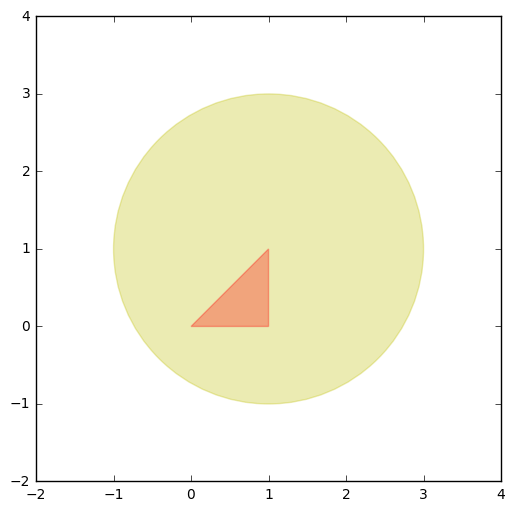

In [4]:
# create PatchArtist from the sympy objects

fig, ax = plt.subplots(1,1, figsize=(6,6))

ax.add_patch(patches.Circle(c.center, c.radius, edgecolor='y', facecolor='y', alpha=0.3))
ax.add_patch(patches.Polygon([tuple(p1), tuple(p2), tuple(p4)], edgecolor='r', facecolor='r', alpha=0.3))

plt.xlim(-2,4)
plt.ylim(-2,4)

As plotting using matplotlib seems to be complicated, the sympy module offers its own plotting library which could not be used with an inline backend for jupyter notebooks as of this writing. Nevertheless, using the sympy geometry module brings some advantages when it comes to computation.

In [5]:
# the Geometries plot a nice reprensentation of themselves when latex compiling is available
print(t)
t

Triangle(Point2D(0, 0), Point2D(1, 1), Point2D(1, 0))


Triangle(Point2D(0, 0), Point2D(1, 1), Point2D(1, 0))

In [6]:
t.area

-1/2

In [7]:
c.area

4*pi

In [8]:
print('p1,p2,p3 on one line? - ', Point.is_collinear(p1,p2,p3))
print('p1,p2,p4 on one line? - ', Point.is_collinear(p1,p2,p4))

p1,p2,p3 on one line? -  True
p1,p2,p4 on one line? -  False


In [9]:
p1.distance(p3)

2*sqrt(2)

In [10]:
t.distance(p3)

sqrt(2)

In [11]:
poly = Polygon(Point(0, 0), Point(1,1), Point(2,1), Point(1,3), Point(0,1))
print('Area:', poly.area)
poly

Area: 5/2


Polygon(Point2D(0, 0), Point2D(1, 1), Point2D(2, 1), Point2D(1, 3), Point2D(0, 1))

In [12]:
poly.angles

{Point2D(0, 1): acos(-2*sqrt(5)/5),
 Point2D(1, 3): acos(3/5),
 Point2D(0, 0): pi/4,
 Point2D(1, 1): 5*pi/4,
 Point2D(2, 1): acos(sqrt(5)/5)}

In [13]:
poly.contains(t)

False

In [14]:
poly2 = Polygon(Point(0,0), Point(1,1), Point(1,3), Point(0,1))
poly.contains(poly)

True

In [15]:
l1 = Line(Point(0, 0), Point(1, 0))
l2 = Line(Point(0, 0), Point(1,1))
product =  l1 * l2 
print(product)

Line(Point2D(0, 0), Point2D(1, 0)) x Line(Point2D(0, 0), Point2D(1, 1))


##### excercise

Use the *poly* object to apply a triangulation by hand. Split the polygon into a various number of right triangles. Check your results by comparing the polygon area to the sum of all triangle areas. Perform a second check, which will test each triangle for being a right angle. Solve the checks in a single conditional each.

In [16]:
## Solution
t1 = Triangle(Point(0, 0), Point(1, 1), Point(0, 1))
t2 = Triangle(Point(0, 1), Point(1, 1), Point(1, 3))
t3 = Triangle(Point(1, 1), Point(2, 1), Point(1, 3))

# check one:
print('Eqaul area?  ', t1.area + t2.area + t3.area == poly.area)
# check two:
print('Right angles?', all([sympy.rad(90) in tri.angles.values() for tri in (t1, t2, t3)]))

Eqaul area?   True
Right angles? True


### numerical geometry

While the sympy package does always solve trigonometric functions to return the exact result, *numerical geometry* means the approximation of results in order to simplify results, decrease computational consumption and perform higher geometric tasks on the entities, that would not be solvable (or too intensive) when working on exact results.   
One library for solving these tasks is the shapely library. This library goes way beyond solving simple trigonometric functions. Shapely incorporates high level geometric procedures and offers a number of interfaces to common GIS-related file formats and libraries.

On the other hand shaply is closer to GIS libraries as implementing only a few basic geometric data types like a Point, Line or Polygon. More specific types like a Triangle or Circle are not implemented and have to be approximated.
Let's at first import the Polygon class and compare a shapely instance to the sympy instance

In [17]:
from shapely.geometry.polygon import Polygon as shapely_Polygon
from sympy import Polygon as sympy_Polygon

In [18]:
Poly = shapely_Polygon([point.args for point in poly.args])
print(Poly)
print('Area:', Poly.area)

POLYGON ((0 0, 1 1, 2 1, 1 3, 0 1, 0 0))
Area: 2.5


In [19]:
%timeit poly.area
%timeit Poly.area

The slowest run took 14.96 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 37.1 µs per loop


The slowest run took 10.45 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.75 µs per loop


Approximating the area is even for this very easy example more than 10 times faster than  deriving an excat solution.

In [20]:
p = sympy_Polygon(Point(0, 0), Point(0.5*sympy.pi, 7), Point(5,8), Point(sympy.pi, 2))
P = shapely_Polygon([point.args for point in p.args])

print('Sympy:      ', p.area)
print('Shapely:     ', P.area)
print('Solve Sympy:', p.area.evalf())

Sympy:       -25/2 - 2*pi
Shapely:      18.783185307179586
Solve Sympy: -18.7831853071796


In [21]:
%timeit p.area
%timeit P.area

100 loops, best of 3: 6.42 ms per loop


The slowest run took 11.07 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.68 µs per loop


A triangle can easily be derived by creating a Polygon. Opposite to common GIS definitions, where a Polygon has to have at least 4 edges, a 3 edged Polygon is fine for shapely. Creating a Circle is more tricky:

In [22]:
print(c)

Circle(Point2D(1, 1), 2)


We need a Circle with center (1 1) and a radius of 2:

In [23]:
from shapely.geometry.point import Point as shapely_Point

C = shapely_Point((1, 1)).buffer(2)
print(C)

POLYGON ((3 1, 2.990369453344394 0.803965719340879, 2.961570560806461 0.6098193559677438, 2.913880671464418 0.4194306454910758, 2.847759065022574 0.2346331352698212, 2.763842528696711 0.0572065263480056, 2.662939224605091 -0.1111404660392035, 2.546020906725475 -0.2687865683272899, 2.414213562373096 -0.4142135623730938, 2.268786568327292 -0.5460209067254727, 2.111140466039206 -0.6629392246050894, 1.942793473651997 -0.763842528696709, 1.765366864730182 -0.8477590650225726, 1.580569354508927 -0.913880671464417, 1.390180644032259 -0.9615705608064604, 1.196034280659124 -0.9903694533443934, 1.000000000000003 -1, 0.8039657193408822 -0.9903694533443941, 0.6098193559677471 -0.9615705608064615, 0.419430645491079 -0.9138806714644188, 0.2346331352698243 -0.847759065022575, 0.0572065263480086 -0.7638425286967121, -0.111140466039201 -0.6629392246050927, -0.2687865683272879 -0.5460209067254764, -0.4142135623730925 -0.4142135623730976, -0.5460209067254718 -0.2687865683272936, -0.6629392246050887 -0.11

In [24]:
print('Sympy Area:  ', c.area, '\tsolved:\t', c.area.evalf())
print('Shapely Area:\t\t\t', C.area)

Sympy Area:   4*pi 	solved:	 12.5663706143592
Shapely Area:			 12.546193962183754


In [25]:
%timeit c.area.evalf()
%timeit C.area

The slowest run took 7.12 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 3: 2.85 ms per loop


The slowest run took 9.68 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.08 µs per loop


### Computational Geometry

Most of the given examples can easily be solved with a pen and paper. Sometimes even faster. The real benefit of using shapely or the scipy stack are intense computational tasks, like a triangulation, complex intersections, buffering of polygons or shortest path problems, which are closely related to mathematical graphs and network analysis.   
This notebook will only give insides on the very basics. For shifting from basic geometry to a proper GIS application written in Python the GIS++ lecture (each summer term at FeLis) is the appropriate lecture.

##### Convex Hull

Let's start with the *Hello World* example of computational geometry: The Convex Hull. Without going too much into details, the convex hull is the minimum set of nodes needed to describe a finite population of nodes in a euclidean plane. We will limit this to a two dimensional case and not examine the actual algorithm. Just use three different approaches to calculate a convex hull.

In [26]:
from sympy.geometry import convex_hull
from scipy.spatial import ConvexHull

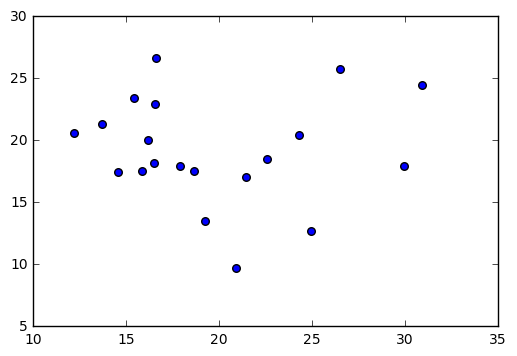

In [27]:
# create a random set of points, not normal distributed
np.random.seed(42)
nodes = np.random.gamma(10, 2, size=(20,2))

# plot
plt.scatter(nodes[:,0], nodes[:,1], 30)

For solving the Convex Hull problem using sympy, we have to convert the nodes into a list of points.

In [28]:
ch = convex_hull(*[Point(node) for node in nodes])
print(ch)

Polygon(Point2D(60972835339031/5000000000000, 41166968480509/2000000000000), Point2D(18212886440957/1250000000000, 174736098044783/10000000000000), Point2D(1304830242119/62500000000, 970963643860821/100000000000000), Point2D(9964975101427/400000000000, 5076842639831/400000000000), Point2D(149771008433929/5000000000000, 22453885421927/1250000000000), Point2D(2414821733583/78125000000, 122544211063351/5000000000000), Point2D(66197746731423/2500000000000, 12860849858341/500000000000), Point2D(8304047545979/500000000000, 133399682754239/5000000000000))


In [29]:
CH = ConvexHull(nodes)
print(CH.simplices)

[[14 11]
 [18 11]
 [18  4]
 [ 6  2]
 [17  2]
 [17 14]
 [10  4]
 [10  6]]


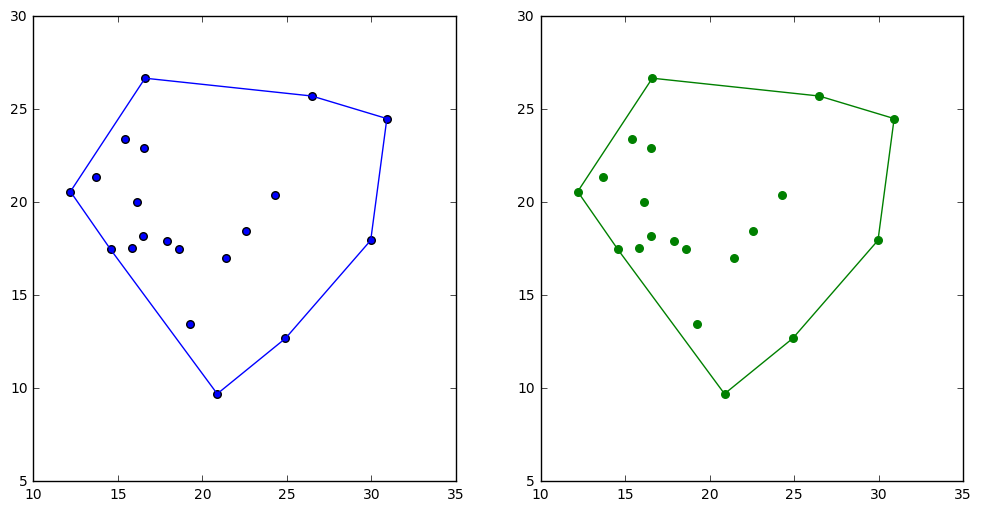

In [30]:
# plot
fig, axes = plt.subplots(1,2, figsize=(12,6))

# Scipy solution
axes[0].scatter(nodes[:,0], nodes[:,1], 30)
for simp in CH.simplices:
    axes[0].plot(CH.points[simp][:,0], CH.points[simp][:,1], '-b')
    
# sympy solution
axes[1].scatter(nodes[:,0], nodes[:,1], 30, color='g')
polypatch = patches.Polygon(np.array([_.evalf().args for _ in ch.args]), edgecolor='g', fill=False)
axes[1].add_patch(polypatch)

Both methods seem to be fine, each one with a preferred way to be plotted, although the plotting logic can be switched. One can easily convert the simplices of the scipy ConvexHull to a Polygon Patch and plot the lines between two sympy Point instances directly. The real difference is again the performance

In [31]:
np.random.seed(42)
%timeit convex_hull(*[Point(_) for _ in np.random.gamma(10, 2, size=(100, 2))])
%timeit ConvexHull(np.random.gamma(10, 2, size=(100, 2)))

1 loop, best of 3: 4.7 s per loop


10000 loops, best of 3: 118 µs per loop


##### Triangulation

Triangulation means representing a finite plane only by triangle geometries by *cutting* the plane into pieces. There are literally hundreds of different algorithms that do not only differ in performance. Most algorithms will return a collection of triangles with very specific properties.   
Historically triangluation played a very important role in plotting planes, as even a few years ago with less powerful computers it was possible to plot a triangle in three dimensions with limited resources. Therfore plotting a set of triangles was less consumptive, than fitting a plane function to some points.    
Triangulations is still used to approximate the area of a polygon. Doing so, an algorithms is required that will only calculate triangles of a minimum area. In other cases the triangles shall not be too big as for example regional statistics is performed based on the triangles.   
Thinking of a triangle network as a mathematical network to be solved, a major requirement to the network is to make the inner angles of the triangles as big as possible as this would minimize rounding errors. Here, the Delaunay triangulation fits exactly this requirement as it fulfills the *circumcurcle rule*.

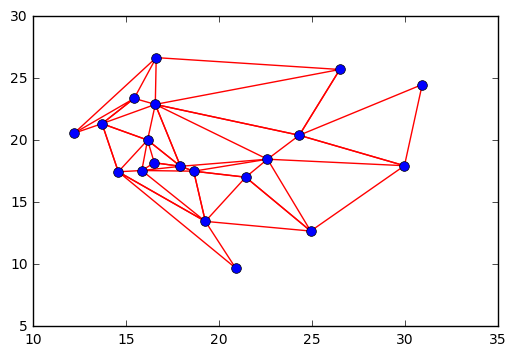

In [32]:
from scipy.spatial import Delaunay

# calculate the Delaunay triangles
delaunay = Delaunay(nodes)

# plot
fig, ax = plt.subplots(1,1)

for simp in delaunay.simplices:
    ax.plot(delaunay.points[simp][:,0], delaunay.points[simp][:,1], '-r')
ax.plot(nodes[:,0], nodes[:,1], 'ob', markersize=7)

##### exercise 

Compare the area of the finite plane using the sympy representation and the area calculated by the delaunay triangulation. Evaluate the Delaunay triangles numerically

In [33]:
# SOLUTION
print('Delaunay area: ', np.sum([shapely_Polygon(delaunay.points[simp]).area for simp in delaunay.simplices]))
print('Sympy area:    ', ch.area.evalf())

Delaunay area:  200.508108501
Sympy area:     200.508108501493


##### Shortest Path

Solving a *shortest path* problem is a very common task in computational geometry. A very common application are navigation systems. Generally spoken, a *shortest path* is the connection of two **vertices** (here: the nodes) in a mathematical network connected by the **edges** (here: the simplices) of least cost. Where the cost of a edge is expressed as a weight.   
In the navigation application the edge weights are either the distances or the transit time, depending on wether the shortest or the fastest path is needed. Once understood how a mathematical network can be solved, we can modify the weights to fit our needs.

There is a number of different algorithms for solving a shortest path in a mathematical network. Some of them are:
  * Floyd-Warshall algorithm
  * Dijkstra algorithm
  * Bellman-Ford alogrithm
  * Johnson's algorithm

Where Floyd and Dijkstra use positive weights while Bellman and Johnson's use negative weights. In the scipy implementation, Dijkstra and Johnson's cannot solve the graph for direction dependend edges.   
**Note:** these algorithms will then solve the network with an icorrect result and do not throw an exception!

In [34]:
from scipy.sparse.csgraph import dijkstra, floyd_warshall, bellman_ford, johnson
from scipy.spatial.distance import pdist, squareform

Usually, you would import an street network an convert it into the apropiate data types to handle them in Python. The actual lenghts of the different routable street segments can be calculated in a GIS software or using the GDAL  or shapely library in Python. In the graph all vertices will be connected by strait lines, not by the geometry of the segment. Therefore two edges might have the same length in the graph but not the same weight as their real world lengths differ.   
Here, we will use the edge lengths as the distances in order to keep things simple. Think of the graph as a city containing only strait streets and no curves. However, no matter what the streets look like, the procedure and the math behind it will always stay the same.   
Therefore, we will use the Delaunay triangle edges as the network edges.

In [35]:
# convert the triangle edges into segments.
segments = list()

for simp in delaunay.simplices:
    segments.extend([(simp[0], simp[1]), (simp[0], simp[2]), (simp[1], simp[2])])
print(len(delaunay.simplices) * 3 == len(segments))

# remove duplicates
edges = list(set(segments))
print('N of edges:', len(edges))

True
N of edges: 63


Secondly, we need a distance matrix, where we can look up the distances for two vertices. We will use the distances as weights directly. For comparison reasons we do not only use the euclidean distance, but also the manhattan distance.

In [36]:
# euclidean distance
distance_eu = squareform(pdist(nodes, metric='euclidean'))
distance_ma = squareform(pdist(nodes, metric='cityblock'))

In [37]:
# check the distance for two vertices:
print('Node 11:', nodes[11], 'Node 19:', nodes[19])

Node 11: [ 12.19456707  20.58348424] Node 19: [ 16.50415755  18.20168594]


##### exercise

calculate the distance by hand:

In [38]:
# SOLUTION
np.sqrt( (nodes[11][0] - nodes[19][0])**2 + (nodes[11][1] - nodes[19][1])**2 )

4.9239753554120398

In [39]:
print('euclidean:' ,distance_eu[11,19])
print('manhattan:', distance_ma[11,19])

euclidean: 4.92397535541
manhattan: 6.69138878774


The last step is to set up the weight matrix. At the moment the distance matrix convers all point combinations. But the network does not define a edge between any combination of vertices. Therefore we need to define a matrix with all allowed edges and their weights. In case we want to punish several edges or cut them out of the graph, we could just remove them from the weight matrix. This matrix will be called the cs_matrix.

In [40]:
# create an empty matrix
cs = np.zeros(distance_eu.shape)

# each segment defines the indices of the edges
for seg in segments:
    cs[seg] = distance_eu[seg]
    cs[seg[::-1]] = distance_eu[seg]
    
# convert the 0.0 weights into NaNs to remove these edges
cs[cs == 0.0] = np.NaN

print(cs[:5, :5])

[[        nan  4.71080554         nan  7.4777414          nan]
 [ 4.71080554         nan         nan  5.17410167         nan]
 [        nan         nan         nan         nan         nan]
 [ 7.4777414   5.17410167         nan         nan         nan]
 [        nan         nan         nan         nan         nan]]


At first we use the Dijkstra algorithm. For larger networks this might be slow, but for 20 vertices and 63 edges it's fine. The function, like any of the others, will return either one or two matrices. The first one gives the smallest weights connection for any valid point combination, which is here already the shortest path distance. The second matrix is only returned if requested and will contain the index of the predecessor of any point. Using this matrix, the path used can be retraced. This is especially important when the weights are not expressed in distances.

In [41]:
# calculate it
weights, pre = dijkstra(cs, return_predecessors=True)

print('Weights:')
print(weights[:5,:5])
print('Predecessors:')
print(pre[:5,:5])

Weights:
[[  0.           4.71080554  10.35393083   7.4777414   10.13549658]
 [  4.71080554   0.          15.06473637   5.17410167   9.00725089]
 [ 10.35393083  15.06473637   0.          14.90575613  18.92686321]
 [  7.4777414    5.17410167  14.90575613   0.          14.18135257]
 [ 10.13549658   9.00725089  18.92686321  14.18135257   0.        ]]
Predecessors:
[[-9999     0    12     0     9]
 [    1 -9999    12     1     9]
 [   12     0 -9999    17    10]
 [    3     3    17 -9999     9]
 [   15    13     6     1 -9999]]


/home/mirko/anaconda3/envs/py3-dev/lib/python3.5/site-packages/numpy/ma/core.py:2249: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))


Now let's look at our distance and example from above, the connection of point 11 and 19:

In [42]:
print('Euclidean:', distance_eu[11,19])
print('Weights:  ', weights[11,19])

Euclidean: 4.92397535541
Weights:   6.09832215168


In [45]:
# get the actual path from 11 to 19

start = 14
finish = 6
path = [finish]

while True:
    next_segment = pre[start, path[-1]]
    if next_segment == -9999:
        # no connection: break
        break
    elif next_segment == start:
        # finished: break
        break
    else:
        # new segment, add to path
        path.append(next_segment)
path.append(start)
reversed(path)

print('Path 11:19: ', ' - '.join(['%d' % _ for _ in path]))

Path 11:19:  6 - 12 - 3 - 14


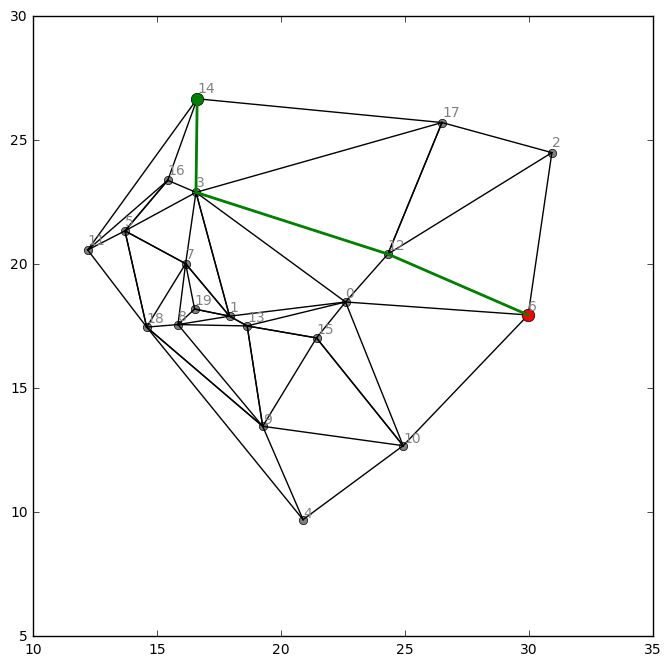

In [46]:
# plot
fig, ax = plt.subplots(1,1, figsize=(8,8))

# plot the vertices
ax.plot(nodes[:,0], nodes[:,1], linestyle='', marker='o', color='gray')

for i, node in enumerate(nodes):
    ax.text(node[0], node[1] *1.01, '%d' % i, color='gray')

# plot the edges
for edge in edges:
    ax.plot(nodes[edge,][:,0], nodes[edge,][:,1], linestyle='-', color='k')

# plot start and end point
ax.plot(nodes[path[0]][0], nodes[path[0]][1], 'or', markersize=9)
ax.plot(nodes[path[-1]][0], nodes[path[-1]][1], 'og', markersize=9)

# plot the path
for i in range(1, len(path)):
    ax.plot(nodes[(path[i - 1], path[i]),][:,0], nodes[(path[i - 1], path[i]),][:,1], '-g', lw=2)

##### excercise

Redo the example above based on the manhattan distance matrix: